In [100]:
# # Install a conda package in the current Jupyter kernel
# import sys
# !conda install --yes --prefix {sys.prefix} jupytab

In [99]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install jupytab-server
# !{sys.executable} -m pip install jupytab

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql
import sqlite3
import sys
import os as os
import subprocess
import shutil

#local packages
import my_toolkit as me
from imp import reload 

In [102]:
#init variables
cwd=os.getcwd()
location=cwd+'/data'


# Obtaining Data

In [ ]:
#download file
me.sys_funcs.runcmd("wget https://github.com/ecodan/school-shooting-data/archive/refs/heads/master.zip", verbose = False)

In [103]:
# #downloading repository from econdan account

# try:
#     os.remove(cwd+'/master.zip')
    
# except OSError:
#     pass

# #download file
# me.sys_funcs.runcmd("wget https://github.com/ecodan/school-shooting-data/archive/refs/heads/master.zip", verbose = False)

# #location variables
# source=os.path.join(os.getcwd(),'master.zip')
# destination=os.path.join(os.getcwd(),'data','ecodan.zip')

# #move to new location
# shutil.move(source, destination)

# #unzip
# shutil.unpack_archive(destination, destination[:-4])

# #remove zipfile
# os.remove(destination)

# Reading Data

In [104]:
#read data location
data_location=os.path.join(os.getcwd(),'data','ecodan','school-shooting-data-master')

#reading school schooting df
df_sc=pd.read_csv(data_location+'/pah_wikp_combo.csv')

In [105]:
#code
df_sc=me.ana_funcs.clean_column_names(df_sc)

df_sc

,date,city,state,areatype,school,fatalities,wounded,dupe,source,desc,unnamed: 10,unnamed: 11
0,3/27/1990,Brooklyn,New York,NaN,C,0,1.0,NaN,Wikp,A black youth was taunted with racial slurs by...,NaN,NaN
1,5/20/1990,Centerville,Tennessee,suburban,HS,1,NaN,NaN,Pah,NaN,NaN,NaN
2,8/26/1990,Las Vegas,Nevada,urban,HS,1,NaN,NaN,Pah,NaN,NaN,NaN
3,9/11/1990,San Antonio,Texas,NaN,HS,0,3.0,NaN,Wikp,3 students were wounded when gunfire broke out...,NaN,NaN
4,1/8/1991,Richardson,Texas,urban,HS,0,NaN,NaN,Pah,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
739,4/5/2022,Erie,Pennsylvania,NaN,HS,0,1.0,NaN,NaN,A student was wounded after multiple shots wer...,NaN,NaN
740,4/22/2022,Washington,District of Columbia,NaN,HS,0,4.0,NaN,NaN,A resident of an adjacent apartment building f...,NaN,NaN
741,5/9/2022,Suwanee,Georgia,NaN,NaN,0,1.0,NaN,NaN,A woman fired 12 shots at a moving school bus....,NaN,NaN
742,5/17/2022,Chicago,Illinois,NaN,ES,0,1.0,NaN,NaN,An 8-year old child found his mother's gun und...,NaN,NaN


# Cleaning & Exploring Data

In [106]:
#remove last columns
df_sc=df_sc.iloc[:,:-2]

df_sc

,date,city,state,areatype,school,fatalities,wounded,dupe,source,desc
0,3/27/1990,Brooklyn,New York,NaN,C,0,1.0,NaN,Wikp,A black youth was taunted with racial slurs by...
1,5/20/1990,Centerville,Tennessee,suburban,HS,1,NaN,NaN,Pah,NaN
2,8/26/1990,Las Vegas,Nevada,urban,HS,1,NaN,NaN,Pah,NaN
3,9/11/1990,San Antonio,Texas,NaN,HS,0,3.0,NaN,Wikp,3 students were wounded when gunfire broke out...
4,1/8/1991,Richardson,Texas,urban,HS,0,NaN,NaN,Pah,NaN
...,...,...,...,...,...,...,...,...,...,...
739,4/5/2022,Erie,Pennsylvania,NaN,HS,0,1.0,NaN,NaN,A student was wounded after multiple shots wer...
740,4/22/2022,Washington,District of Columbia,NaN,HS,0,4.0,NaN,NaN,A resident of an adjacent apartment building f...
741,5/9/2022,Suwanee,Georgia,NaN,NaN,0,1.0,NaN,NaN,A woman fired 12 shots at a moving school bus....
742,5/17/2022,Chicago,Illinois,NaN,ES,0,1.0,NaN,NaN,An 8-year old child found his mother's gun und...


In [81]:
#checking for nulls
# missing data
((df_sc
 .isna()
 .mean()
 *100)
 .pipe(lambda ser:ser[ser>0])
)

areatype    48.790323
school       0.268817
wounded     51.209677
dupe        81.451613
source       4.973118
desc        51.478495
dtype: float64

In [82]:
df_sc.describe()


,fatalities,wounded
count,744.000000,363.000000
mean,1.141129,1.942149
std,2.756170,3.288094
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,2.000000
max,33.000000,23.000000


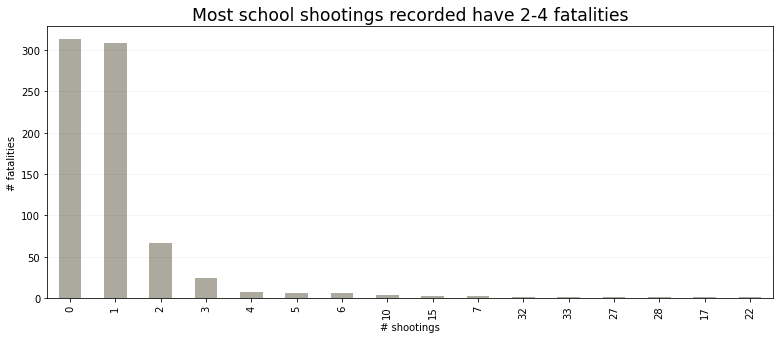

In [83]:
#data
data=df_sc['fatalities'].value_counts() 

#customization
title= 'Most school shootings recorded have 2-4 fatalities'
x_label='# shootings'
y_label='# fatalities'
legend_values=[""]

#graph
me.vis_funcs.my_vbar(data,title, x_label, y_label, legend_values)

In [84]:
df_sc.dtypes

date           object
city           object
state          object
areatype       object
school         object
fatalities      int64
wounded       float64
dupe           object
source         object
desc           object
dtype: object

In [85]:
#renaiming states values
value_dict={'District Of Columbia':'D.C.', 'District of Columbia':'D.C.', 'IA':'Indiana'}
me.ana_funcs.renaming_var(df_sc,'state',value_dict)

,date,city,areatype,school,fatalities,wounded,dupe,source,desc,state
0,3/27/1990,Brooklyn,NaN,C,0,1.0,NaN,Wikp,A black youth was taunted with racial slurs by...,New York
1,5/20/1990,Centerville,suburban,HS,1,NaN,NaN,Pah,NaN,Tennessee
2,8/26/1990,Las Vegas,urban,HS,1,NaN,NaN,Pah,NaN,Nevada
3,9/11/1990,San Antonio,NaN,HS,0,3.0,NaN,Wikp,3 students were wounded when gunfire broke out...,Texas
4,1/8/1991,Richardson,urban,HS,0,NaN,NaN,Pah,NaN,Texas
...,...,...,...,...,...,...,...,...,...,...
739,4/5/2022,Erie,NaN,HS,0,1.0,NaN,NaN,A student was wounded after multiple shots wer...,Pennsylvania
740,4/22/2022,Washington,NaN,HS,0,4.0,NaN,NaN,A resident of an adjacent apartment building f...,D.C.
741,5/9/2022,Suwanee,NaN,NaN,0,1.0,NaN,NaN,A woman fired 12 shots at a moving school bus....,Georgia
742,5/17/2022,Chicago,NaN,ES,0,1.0,NaN,NaN,An 8-year old child found his mother's gun und...,Illinois


# Creating SQL Table

In [86]:
#create main shootings table
table='CREATE TABLE IF NOT EXISTS shootings (date, city, state, areatype, school, fatalities, wounded, dupe, source, desc)'    
me.ana_funcs.sqlite_create_table('db_sch_sh', table, df_sc) 

table  shootings successfully created


,city,state,areatype,school,fatalities,wounded,dupe,source,desc
date,,,,,,,,,
3/27/1990,Brooklyn,New York,None,C,0,1.0,NaN,Wikp,A black youth was taunted with racial slurs by...
5/20/1990,Centerville,Tennessee,suburban,HS,1,NaN,NaN,Pah,None
8/26/1990,Las Vegas,Nevada,urban,HS,1,NaN,NaN,Pah,None
9/11/1990,San Antonio,Texas,None,HS,0,3.0,NaN,Wikp,3 students were wounded when gunfire broke out...
1/8/1991,Richardson,Texas,urban,HS,0,NaN,NaN,Pah,None
...,...,...,...,...,...,...,...,...,...
4/5/2022,Erie,Pennsylvania,None,HS,0,1.0,NaN,None,A student was wounded after multiple shots wer...
4/22/2022,Washington,District of Columbia,None,HS,0,4.0,NaN,None,A resident of an adjacent apartment building f...
5/9/2022,Suwanee,Georgia,None,None,0,1.0,NaN,None,A woman fired 12 shots at a moving school bus....


### Adding year to database

In [87]:
#update data in database

#prepare data
df_q=df_sc.copy()
df_q['date']= pd.to_datetime(df_sc['date'])
df_q['year']=(
    df_q.date.dt.year
)
df_q
#update table
me.ana_funcs.sqlite_create_table('db_sch_sh', table, df_q) 

table  shootings successfully created


,city,state,areatype,school,fatalities,wounded,dupe,source,desc,year
date,,,,,,,,,,
1990-03-27 00:00:00,Brooklyn,New York,None,C,0,1.0,NaN,Wikp,A black youth was taunted with racial slurs by...,1990
1990-05-20 00:00:00,Centerville,Tennessee,suburban,HS,1,NaN,NaN,Pah,None,1990
1990-08-26 00:00:00,Las Vegas,Nevada,urban,HS,1,NaN,NaN,Pah,None,1990
1990-09-11 00:00:00,San Antonio,Texas,None,HS,0,3.0,NaN,Wikp,3 students were wounded when gunfire broke out...,1990
1991-01-08 00:00:00,Richardson,Texas,urban,HS,0,NaN,NaN,Pah,None,1991
...,...,...,...,...,...,...,...,...,...,...
2022-04-05 00:00:00,Erie,Pennsylvania,None,HS,0,1.0,NaN,None,A student was wounded after multiple shots wer...,2022
2022-04-22 00:00:00,Washington,District of Columbia,None,HS,0,4.0,NaN,None,A resident of an adjacent apartment building f...,2022
2022-05-09 00:00:00,Suwanee,Georgia,None,None,0,1.0,NaN,None,A woman fired 12 shots at a moving school bus....,2022


In [88]:
# Table definition for Tableau
import jupytab
tables = jupytab.Tables()
tables['shootings'] = jupytab.DataFrameTable('Main School Shooting Table', dataframe=df_q)

### Trending Fatalities per State

In [89]:
#trending fatalities per state

#query
q=(
'''
SELECT
  distinct(year), 
  state, 
  sum(fatalities) over(partition by state order by year ASC) as fatalities_per_year
FROM shootings
order by year ASC
'''
)

data= me.ana_funcs.sqlite_run_query('db_sch_sh',q) 
data

,state,fatalities_per_year
year,,
1990,Nevada,1
1990,New York,0
1990,Tennessee,1
1990,Texas,0
1991,California,2
...,...,...
2022,Pennsylvania,32
2022,South Carolina,12
2022,Texas,66


In [90]:
# Table definition for Tableau
tables['fatalities_per_state'] = jupytab.DataFrameTable('Fatalities per State', dataframe=data)

### Known Shooter Profile (Age)

In [91]:
#obtain data
import re

df_q=(
    pd.Series(df_sc['desc'][:])
    .fillna("")
)
l=[]
regex=re.compile(r"(\b([0-9]|[1-9][0-9])\b-year-old)")

for row in df_q:
    if row !="":
        try:
            x=re.search(regex, row)
            x=str(x).split('=')[2].replace('-',' ')
            x=re.sub("[''>]",'',x)
            l.append(x)
        except:
            l.append(np.nan)
    else:
        l.append(np.nan)
        

df_sc['inferred_age']=l
print(df_sc)


          date         city                 state  areatype school  \
0    3/27/1990     Brooklyn              New York       NaN      C   
1    5/20/1990  Centerville             Tennessee  suburban     HS   
2    8/26/1990    Las Vegas                Nevada     urban     HS   
3    9/11/1990  San Antonio                 Texas       NaN     HS   
4     1/8/1991   Richardson                 Texas     urban     HS   
..         ...          ...                   ...       ...    ...   
739   4/5/2022         Erie          Pennsylvania       NaN     HS   
740  4/22/2022   Washington  District of Columbia       NaN     HS   
741   5/9/2022      Suwanee               Georgia       NaN    NaN   
742  5/17/2022      Chicago              Illinois       NaN     ES   
743  5/24/2022       Uvalde                 Texas       NaN     ES   

     fatalities  wounded dupe source  \
0             0      1.0  NaN   Wikp   
1             1      NaN  NaN    Pah   
2             1      NaN  NaN    Pah   

In [92]:
# Table definition for Tableau
data=(df_sc[df_sc['inferred_age'].notnull()]
      .drop(['dupe', 'source'], axis=1)
)
data
tables['shooter_profile'] = jupytab.DataFrameTable('Shooter Profile', dataframe=data)

### Known Shooter Profile (AreaType)

### Shootings per State (per capita)

## Finished Plots

### Fatalities per Type of School

        Tot_fatalities
school                
HS                 390
C                  263
ES                 123
MS                  65
-                    7
None                 1
   index School  Tot_fatalities
0      0      C             263
1      1     HS             390
2      2     MS              65
3      3     ES             123


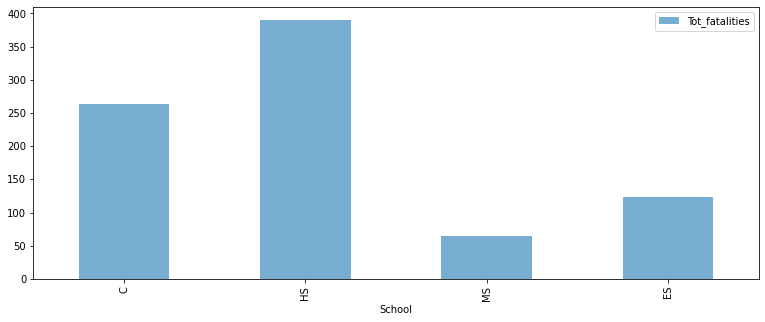

In [93]:
q=(
'''
SELECT
    DISTINCT(School),
    SUM(Fatalities) as Tot_fatalities
FROM shootings
GROUP BY School
ORDER BY Tot_fatalities DESC
'''
)
data=me.ana_funcs.sqlite_run_query('db_sch_sh',q)
print(data)


#reordering columns based on education level
data=pd.DataFrame(data, columns=['Tot_fatalities'],index=['C', 'HS', 'MS', 'ES'])

data=(data
    .reset_index())
data.rename(columns={data.columns[0]:'School'}, inplace=True)

#graph
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5), sharex=True)
ax=(data
    .plot(x='School', kind = 'bar',alpha=0.6, ax=ax) 
)

print(data.reset_index())

### Total Victims (Fatalities + Wounded)

              Tot_victims
state                    
California          140.0
Texas                98.0
Virginia             80.0
Florida              66.0
Oregon               55.0
Colorado             54.0
Illinois             46.0
Michigan             45.0
Pennsylvania         42.0
Georgia              37.0


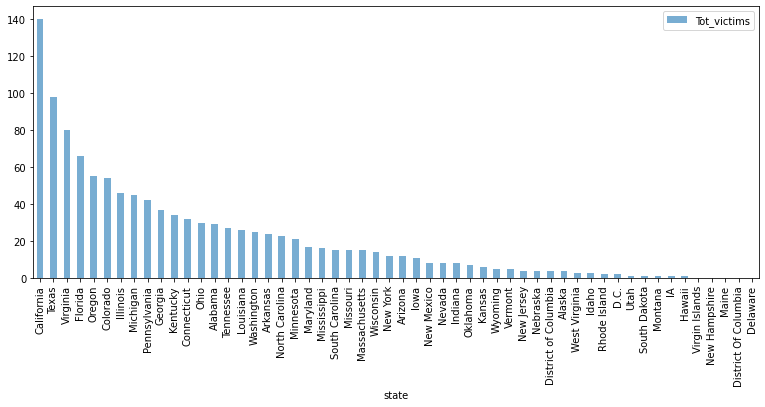

In [94]:
q=(
'''
SELECT
    DISTINCT(State),
    SUM(Fatalities +Wounded) as Tot_victims
FROM shootings
GROUP BY State
ORDER BY Tot_victims DESC
'''
)
data=me.ana_funcs.sqlite_run_query('db_sch_sh',q)
print(data[:10])

#graph
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5), sharex=True)

ax=(data
    .reset_index()
    .plot(x='state', kind = 'bar',alpha=0.6, ax=ax)) 

### Top 10 States with fatalities since 1990 

              Tot_fatalities
state                       
California               102
Virginia                  76
Texas                     66
Connecticut               57
Florida                   46
Colorado                  38
Pennsylvania              32
Washington                31
Minnesota                 26
Oregon                    23


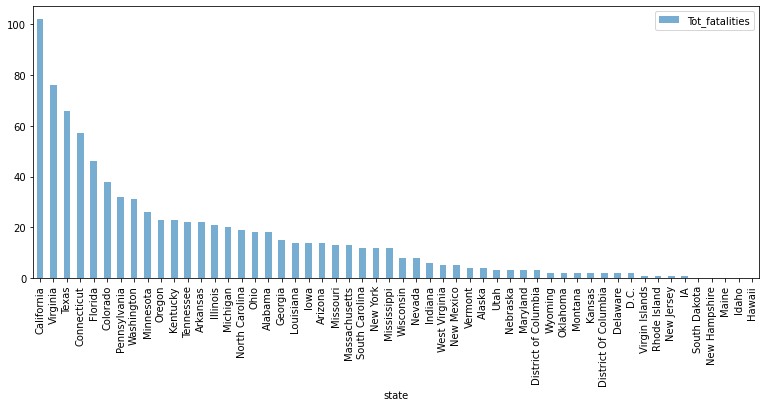

In [95]:
#Top 10 States with fatalities since 1990 
q=(
'''
SELECT
    DISTINCT(State),
    SUM(Fatalities) as Tot_fatalities
FROM shootings
GROUP BY State
ORDER BY Tot_fatalities DESC
'''
)
data=me.ana_funcs.sqlite_run_query('db_sch_sh',q)
print(data[:10])

#graph
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5), sharex=True)

ax=(data
    .reset_index()
    .plot(x='state', kind = 'bar',alpha=0.6, ax=ax,) 
   )

## Connecting to Tableau Public using Jupytab

In [96]:
# GET /schema
tables.render_schema()

[{"id": "shootings", "alias": "Main School Shooting Table", "columns": [{"id": "date", "dataType": "datetime"}, {"id": "city", "dataType": "string"}, {"id": "state", "dataType": "string"}, {"id": "areatype", "dataType": "string"}, {"id": "school", "dataType": "string"}, {"id": "fatalities", "dataType": "int"}, {"id": "wounded", "dataType": "float"}, {"id": "dupe", "dataType": "string"}, {"id": "source", "dataType": "string"}, {"id": "desc", "dataType": "string"}, {"id": "year", "dataType": "int"}]}, {"id": "fatalities_per_state", "alias": "Fatalities per State", "columns": [{"id": "state", "dataType": "string"}, {"id": "fatalities_per_year", "dataType": "int"}]}, {"id": "shooter_profile", "alias": "Shooter Profile", "columns": [{"id": "date", "dataType": "string"}, {"id": "city", "dataType": "string"}, {"id": "state", "dataType": "string"}, {"id": "areatype", "dataType": "string"}, {"id": "school", "dataType": "string"}, {"id": "fatalities", "dataType": "int"}, {"id": "wounded", "dataT

In [97]:
# GET /data
tables.render_data(REQUEST)

NameError: name 'REQUEST' is not defined

SyntaxError: cannot assign to operator (1184480170.py, line 1)

### Bibliography
[1] [Jupytab Project Documentation](https://github.com/CFMTech/Jupytab)